In [1]:
import pandas as pd
import numpy as np

input_path = "../data/raw/datacos_yt.parquet"

data = pd.read_parquet(input_path)


# Split Artists
### Featuring
Relatively easy, we remove punctuation after the abbreviation and simply match:
- feat
- ft
- featuring


In [26]:
PERFORMER_COL = "performer_perf"
FEATURING_TOKEN = "featuring"

# lowercase
performers = data[PERFORMER_COL].str.lower()
# normalize punctiation
performers = performers.str.replace(" feat. ", " feat ").str.replace(" ft. ", " ft ")
# normalize featuring abbrv.
performers = performers.str.replace(" feat ", f" {FEATURING_TOKEN} ").str.replace(" ft ", f" {FEATURING_TOKEN} ")


### And, &
This is more difficult since the "and" or "&" can also be part of the artist name.
For instance, "Jim & Jesse" and "Claes Janson & Internationalorkestern" are one artist. Still, we separate those.
"And" variations:
- &
- and
- y (Spanish) --> only 5 rows, all spanish
- e (Portuguese & Italian) --> only 15 rows
- und (German) --> only 3 rows, all German
- et (French) --> 28 rows, all Frenach
- ,


In [27]:
AND_VARIATIONS_LONG = [
    # and + genetive
    "and his", "and her", "y su", "e la sua", 
    "e la seu", "e seu", "e sua", "und sein", "und ihr", 
    "und seine", "und ihre", "et le", "et son", "et ses", 
    "et les", 
    # with...
    "with her", "with his", "with the", 
    "mit ihrem", "mit ihren", "mit seinem", "mit seinen",
    "com o seu", "com o"]

AND_VARIATIONS_SHORT = ["&", "and", "y", "e", "et", "und", ",", "-", "con", "avec", "mit", "com"]

performers = performers.str.replace(", ", " , ")

# replace long variations
for and_var in AND_VARIATIONS_LONG:
    performers = performers.str.replace(f" {and_var} ", f" {FEATURING_TOKEN} ")

# replace short variations
for and_var in AND_VARIATIONS_SHORT:
    performers = performers.str.replace(f" {and_var} ", f" {FEATURING_TOKEN} ")


# Split and analyze

In [28]:
performers_split = performers.apply(lambda x: [t.strip() for t in x.split("featuring")])
num_performers = performers_split.apply(len)

print(f"Median performers per song {num_performers.median()}")
num_performers.describe()


Median performers per song 1.0


count    13668.000000
mean         1.259511
std          0.521613
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: performer_perf, dtype: float64

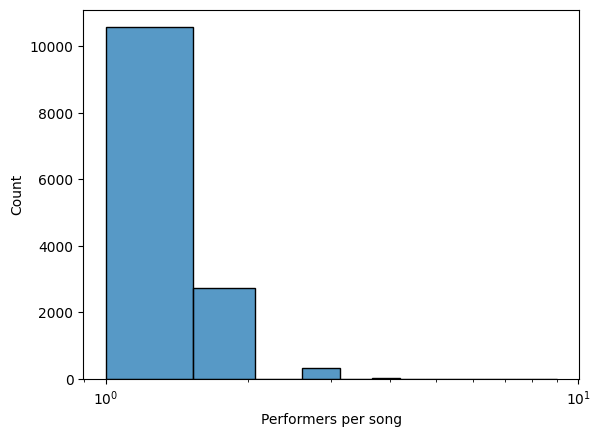

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(num_performers)
plt.xlabel("Performers per song")
plt.xscale("log")
plt.show()
